# Exploring H-2 Visa Certification Data #

The H-2 visa program allows US employers to submit requests to hire foreign nationals for temporary non-agricultural work in the United States. The following exercise explores [visa application data](https://github.com/BuzzFeedNews/H-2-certification-data) aggregated by BuzzFeed that spans a timeframe of FY2000 through FY2016 Q2.

## Introduction to the Data ##

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [530]:
# Read in the data.
visa_data = pd.read_csv('H-2-certification-decisions.csv', low_memory=False)

In [531]:
# Check the size of the dataframe.
visa_data.shape

(213155, 22)

In [532]:
# List out the columns.
visa_data.columns

Index(['case_no', 'visa_type', 'fy', 'last_event_date', 'case_status',
       'n_requested', 'n_certified', 'is_certified',
       'certification_begin_date', 'certification_end_date', 'job_title',
       'employer_name', 'employer_state', 'employer_city',
       'employer_address_1', 'employer_address_2', 'employer_postal_code',
       'worksite_state', 'worksite_city', 'agent_name', 'organization_flag',
       'is_duplicate'],
      dtype='object')

In [533]:
# Preview the column values.
visa_data.head()

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
0,9455254,H-2B,2000,1999-10-01,"DENIED, TEMPORARY",1.0,0,False,NaN,NaN,...,CA,LOS ANGELES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8222219,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,BEAVER CREEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8222168,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",2.0,2,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8222169,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",5.0,5,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8222170,H-2B,2000,1999-10-04,"CERTIFIED, TEMPORARY",40.0,40,True,NaN,NaN,...,CO,MT. CRESTED BUTTE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploration ##

In [534]:
# How many types of visas are there?
visa_data['visa_type'].unique()

array(['H-2B', 'H-2A'], dtype=object)

H-2A visas are for agricultural workers and H-2B visas are for non-agricultural, unskilled workers.

In [535]:
# How many cases are there for each visa type?
visa_data['visa_type'].value_counts()

H-2B    122662
H-2A     90493
Name: visa_type, dtype: int64

In [536]:
# How are the date values represented?
visa_data['last_event_date'].dtypes

dtype('O')

In [537]:
visa_data['fy'].dtypes

dtype('int64')

In [538]:
# What is the format?
visa_data['last_event_date'].tail()

213150    2016-03-31
213151    2016-03-31
213152    2016-03-31
213153    2016-03-31
213154    2016-03-31
Name: last_event_date, dtype: object

The date format for `last_event_date` is `YYYY-MM-DD`.

In [539]:
visa_data['fy'].head()

0    2000
1    2000
2    2000
3    2000
4    2000
Name: fy, dtype: int64

The format for `fy` is `YYYY`.

In [540]:
# Convert date strings to datetime values.
visa_data['last_event_date'] = pd.to_datetime(visa_data['last_event_date'], format='%Y-%m-%d')

In [541]:
visa_data['last_event_date'].dtypes

dtype('<M8[ns]')

In [542]:
visa_data['fy'] = pd.to_datetime(visa_data['fy'], format='%Y')

In [543]:
visa_data['fy'].dtypes

dtype('<M8[ns]')

In [544]:
# Look at the range of dates.
print(visa_data['last_event_date'].dt.year.unique(), '\n')
print(visa_data['fy'].dt.year.unique())

[ 1999.  2000.  2001.  2002.  2003.  2004.  2005.    nan  2006.  2007.
  2008.  2009.  2010.  2011.  2012.  2013.  2014.  2015.  2016.] 

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


The `FY` column has no missing values. Also note that `FY` does not necessarily correspond to calendar year so may not match the year of `last_event_date`.

In [545]:
# Count null values in last_event_date.
print(visa_data['last_event_date'].isnull().sum(), 'of 213155')

7469 of 213155


In [546]:
# How is the yearly data distributed?
print(visa_data['fy'].dt.year.value_counts())

2007    22305
2008    19854
2006    18736
2015    16860
2009    15207
2014    14872
2013    13095
2016    12373
2012    12258
2010    11929
2011    11771
2004     9342
2003     8317
2005     7236
2002     7220
2001     6866
2000     4914
Name: fy, dtype: int64


In [547]:
# What about the range of most recent event dates by visa type?
h2a_visas = visa_data[visa_data['visa_type'] == 'H-2A'] 
h2b_visas = visa_data[visa_data['visa_type'] == 'H-2B']
print('H-2A: ', h2a_visas['last_event_date'].dt.year.unique(), '\n')
print('H-2B: ', h2b_visas['last_event_date'].dt.year.unique())

H-2A:  [   nan  2006.  2007.  2008.  2009.  2010.  2011.  2012.  2013.  2014.
  2015.  2016.] 

H-2B:  [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]


All the null values for `last_event_date` fall within the H-2A visa category.

In [548]:
# Look at FY range by visa type.
print('H-2A: ', h2a_visas['fy'].dt.year.unique(), '\n')
print('H-2B: ', h2b_visas['fy'].dt.year.unique())

H-2A:  [2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016] 

H-2B:  [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


Later, we will want to draw comparisons between H-2A and H-2B visas, so we will restrict the data for both to the same date range. Since the H-2A data only spans FY2006–FY2016, we will use this range.

In [549]:
# What are the possible case statuses?
visa_data['case_status'].unique()

array(['DENIED, TEMPORARY', 'CERTIFIED, TEMPORARY',
       'REMAND ISSUED TO STATE', 'REMAND ISSUED TO EMPLOYER',
       'RECEIVED REGIONAL OFFICE', 'WITHDRAWN',
       'RETURNED BY EMP AFTER REMAND', 'CERTIFIED',
       'REDUCTION IN RECRUITMENT DENIED', 'NOF ISSUED', 'CERTIFIED - FULL',
       'CERTIFIED - PARTIAL', 'DENIED', 'INCOMPLETE', 'RECEIVED',
       'MODIFICATION', 'PARTIAL CERTIFIED', 'DATA REVIEW', 'FINAL REVIEW',
       'REMAND TO SWA', 'DETERMINATION ISSUED - CERTIFICATION',
       'DETERMINATION ISSUED - CERTIFICATION EXPIRED',
       'DETERMINATION ISSUED - WITHDRAWN',
       'DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED',
       'DETERMINATION ISSUED - DENIED',
       'DETERMINATION ISSUED - PARTIAL CERTIFICATION',
       'PARTIAL CERTIFICATION EXPIRED', 'CERTIFICATION EXPIRED',
       'CERTIFICATION', 'PARTIAL CERTIFICATION'], dtype=object)

These categories can likely be consolidated into 'related statuses,' which we will determine later on.

In [550]:
# Calculate summary statistics for n_requested (number of visas (= workers) requested for the case in question).
visa_data['n_requested'].describe()

count    141512.000000
mean         18.916516
std          42.546266
min           0.000000
25%           3.000000
50%           8.000000
75%          19.000000
max        1866.000000
Name: n_requested, dtype: float64

In [551]:
# Calculate summary statistics for n_certified (number of visas (= workers) certified for the case in question).
visa_data['n_certified'].describe()

count    213155.000000
mean         16.053646
std          39.135363
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1866.000000
Name: n_certified, dtype: float64

Note that `count` is higher here than for `n_requested`, indicating many null values in the `n_requested` column.

In [552]:
# What are the different jobs visas are requested for?
visa_data['job_title'].unique()

array(['PROJECT DIRECTOR', 'LAUNDRY LABORER',
       'COUNTER ATTENDANT, CAFETERIA', ...,
       'SWIMMING POOL TECHNICIAN HELPER', 'FOOD BATCH MAKERS',
       'TEMPORARY RESORT WORKER II - LONG SEASON'], dtype=object)

In [553]:
# There are too many to cleanly list. How many are there?
print(len(visa_data['job_title'].unique()))

8753


In [554]:
# Which are the most and least common?
visa_data['job_title'].value_counts()

LABORER, LANDSCAPE                               24595
CLEANER, HOUSEKEEPING                             6563
FARMWORKERS AND LABORERS, CROP                    5354
FARMWORKER; DIVERSIFIED CROP                      5273
SHEEPHERDER                                       5258
LANDSCAPE LABORER                                 4942
STABLE ATTENDANT                                  4198
FARMWORKER, DIVERSIFIED CROP                      2978
FARMWORKER                                        2965
KITCHEN HELPER                                    2919
SHEEP HERDER                                      2894
CONSTRUCTION WORKER I                             2651
CONSTRUCTION WORKER II                            2472
GROUNDSKEEPER, INDUSTRIAL COMMERCIAL              2457
FARM WORKERS & LABORERS, CROP                     2227
COOK                                              2213
FARM WORKER; DIVERSIFIED CROPS II                 2159
FARM WORKER                                       2070
DINING ROO

In [555]:
# What are the different types of organizations requesting visas?
visa_data['organization_flag'].unique()

array([nan, 'S', 'A', 'J', 'M', 'Individual Employer',
       'H-2A Labor Contractor or Job Contractor',
       'Association - Joint Employer (H-2A Only)',
       'Association - Filing as Agent (H-2A Only)',
       'Association - Sole Employer (H-2A Only)'], dtype=object)

In [556]:
# How many requests are there per organization type?
visa_data['organization_flag'].value_counts()

S                                            25085
Individual Employer                          14143
Association - Filing as Agent (H-2A Only)     3900
H-2A Labor Contractor or Job Contractor       2073
J                                              883
Association - Joint Employer (H-2A Only)       463
A                                              354
M                                              202
Association - Sole Employer (H-2A Only)         19
Name: organization_flag, dtype: int64

## Digging Deeper: Further Exploration and Data Cleaning ##

We can get a broad view of missing data in our dataset by using [Aleksey Bilogur's `missingno` visualization tool](https://github.com/ResidentMario/missingno).

In [557]:
import missingno as msno

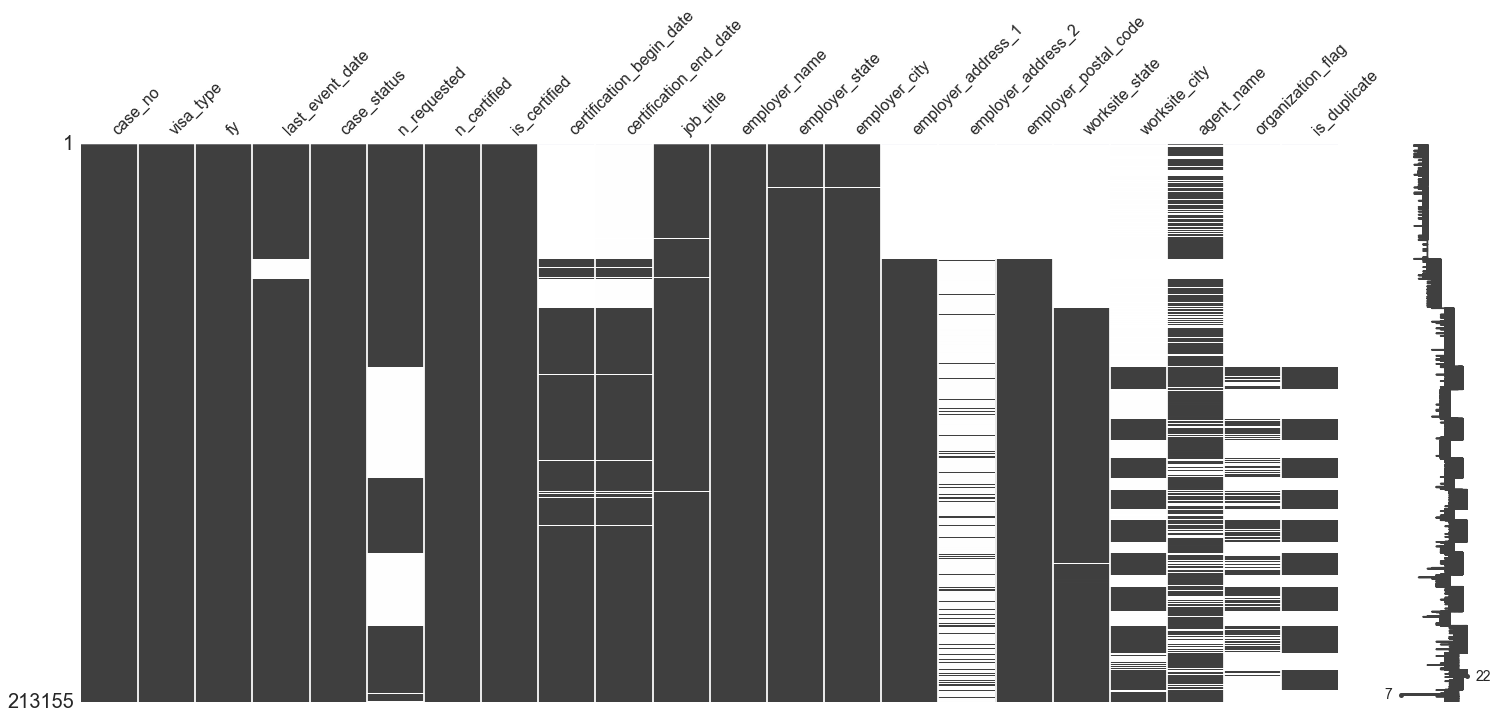

In [558]:
msno.matrix(visa_data)

First, the `is_duplicate` column has the value `True` if the row corresponds to a visa application that appears elsewhere in the dataset as part of a [joint employer's 'master application,'](https://www.foreignlaborcert.doleta.gov/h_2a_details.cfm) so we can remove any rows where `is_duplicate` is `True`.

In [559]:
visa_data_no_dups = visa_data[visa_data['is_duplicate'] != True]
visa_data_no_dups.shape

(184993, 22)

Next, let's take a closer look at the `n_requested` and `n_certified` columns. We said above that `n_requested` has a lot of null values, but we will keep these rows for now. But we should check to see whether there are any rows where `n_certified` is greater than `n_requested`. If so, this is a mistake and we should remove these rows from the dataset.

In [560]:
# Capture instances where n_certified > n_requested.
vd_cert_greater_than_req = visa_data_no_dups[visa_data_no_dups['n_certified'] > visa_data_no_dups['n_requested']]
vd_cert_greater_than_req

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
151531,C-12167-34999,H-2A,2012-01-01,2012-09-04,CERTIFIED - FULL,9.0,19,True,2012-09-04,2012-12-20,...,UT,EPHRAIM,488 SOUTH 100 EAST,NaN,84627,UT,EPHRAIM,TERESA E. PHILLIPS,S,False
191287,H-300-15117-006657,H-2A,2015-01-01,2015-05-14,DETERMINATION ISSUED - PARTIAL CERTIFICATION,100.0,121,True,2015-06-15,2015-08-30,...,CT,WINDSOR,65 THRALL ROAD,"MAILING: 65 THRALL ROAD , WINDSOR CT 06095",06095,CT,Windsor,"MAS LABOR H-2A, LLC:ELIZABETH WHITLEY",Individual Employer,False
199495,H-400-15079-716705,H-2B,2015-01-01,2015-04-07,PARTIAL CERTIFICATION,1.0,14,True,2015-04-15,2015-09-15,...,UT,OREM,"1145 SOUTH 800 EAST, SUITE 211",NaN,84097,OH,NaN,NaN,NaN,NaN
210837,H-400-15337-747248,H-2B,2016-01-01,2016-02-10,CERTIFICATION,8.0,84,True,2016-03-01,2016-12-01,...,MD,FORT WASHINGTON,8911 OXON HILL ROAD,NaN,20744,MD,Fort Washington,WORKFORCE ADVANTAGE:FERNANDO SAENZ,NaN,NaN
211604,H-400-15337-807946,H-2B,2016-01-01,2016-03-03,CERTIFICATION,6.0,12,True,2016-04-01,2016-12-01,...,VA,CHATHAM,300 GREENBAY ROAD,NaN,24531,VA,Chatham,"MAS LABOR H-2B, LLC:ELIZABETH WHITLEY",NaN,NaN
212263,H-400-16004-493518,H-2B,2016-01-01,2016-03-17,PARTIAL CERTIFICATION,1.0,8,True,2016-04-01,2016-11-15,...,KY,LEXINGTON,4101 TATES CREEK CENTER DRIVE,STE. 150,40517,KY,Nicholasville,NaN,NaN,NaN
212714,H-400-15342-029337,H-2B,2016-01-01,2016-03-24,CERTIFICATION,2.0,3,True,2016-04-01,2016-12-14,...,NY,RIVERHEAD,898 OSTRANDER AVENUE,NaN,11901,NY,Riverhead,ZWAIK GILBERT AND ASSOCIATES:MELINDA RUBIN,NaN,NaN


There are seven instances where we certified more visas than were requested. Let's remove these from the dataset.

In [561]:
vd_cert_greater_than_req.index

Int64Index([151531, 191287, 199495, 210837, 211604, 212263, 212714], dtype='int64')

In [562]:
# Removed rows where n_certified > n_requested.
vd_good_certs = visa_data_no_dups.drop(vd_cert_greater_than_req.index)
print(visa_data_no_dups.shape, '\n')
print(vd_good_certs.shape)

(184993, 22) 

(184986, 22)


Let's follow a similar procedure for `certification_begin_date` and `certification_end_date`. We will remove any rows where `certification_begin_date` is later than `certification_begin_date`.

In [563]:
# First, examine the dtype and format of certification_begin_date.
print(vd_good_certs['certification_begin_date'].dtypes, '\n')
print(vd_good_certs['certification_begin_date'].unique())

object 

[nan '2006-05-20' '2006-05-27' ..., '2016-05-03' '2016-06-05' '2016-04-20']


In [564]:
# Do the same for certification_end_date.
print(vd_good_certs['certification_end_date'].dtypes, '\n')
print(vd_good_certs['certification_end_date'].unique())

object 

[nan '2006-12-23' '2006-12-01' ..., '2017-01-07' '2017-03-23' '2017-03-13']


In [565]:
# Convert date strings to datetime values.
vd_good_certs['certification_begin_date'] = pd.to_datetime(vd_good_certs['certification_begin_date'], format='%Y-%m-%d')
vd_good_certs['certification_end_date'] = pd.to_datetime(vd_good_certs['certification_end_date'], format='%Y-%m-%d')

In [566]:
# Ensure we have the correct dtypes.
print(vd_good_certs['certification_begin_date'].dtypes, '\n')
print(vd_good_certs['certification_end_date'].dtypes)

datetime64[ns] 

datetime64[ns]


In [567]:
# Capture instances where certification_begin_date > certification_end_date.
vd_beg_gr_than_end = vd_good_certs[vd_good_certs['certification_begin_date'] > vd_good_certs['certification_end_date']]
vd_beg_gr_than_end

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
82757,C-07141-25326,H-2B,2007-01-01,2007-07-18,DENIED,1.0,0,False,2007-06-01,NaT,...,CA,GRANDA HILLS,16326 BARNESTON ST,NaN,91344,CA,NaN,NaN,NaN,NaN
87211,A-08004-05290,H-2A,2008-01-01,2008-02-08,CERTIFIED - FULL,NaN,5,True,2008-03-10,2008-02-08,...,KY,RICHMOND,603 WEST MAIN STREET,NaN,40475,KY,RICHMOND,"DONNA GRAVES, AGRICULTURE WORKFORCE MANAGEMENT",S,False
87876,A-07360-05164,H-2A,2008-01-01,2008-02-19,CERTIFIED - FULL,NaN,10,True,2008-03-15,2008-02-19,...,KY,RUSSELLVILLE,8759 FRANKLIN ROAD,NaN,42276,KY,RUSSELLVILLE,"DONNA C. GRAVES, AGRICULTURE WORKFORCE MANAGEM...",S,False
89413,A-08045-05915,H-2A,2008-01-01,2008-03-14,CERTIFIED - FULL,NaN,5,True,2008-04-14,2008-03-14,...,KY,OWENTON,1290 HWY 127N,NaN,40359,KY,OWENTON,AGRICULTURE WORKFORCE MANAGEMENT,S,False
90494,A-08064-06215,H-2A,2008-01-01,2008-04-02,CERTIFIED - FULL,NaN,14,True,2008-05-01,2008-04-02,...,KY,SCOTTSVILLE,38 SILVER OAK COURT,NaN,42164,KY,ALLEN & MONROE COUNTIES,DONNA GRAVES,J,False
90743,A-08079-06443,H-2A,2008-01-01,2008-04-14,CERTIFIED - FULL,NaN,7,True,2008-05-13,2008-04-14,...,KY,STAMPING GROUND,PO BOX 447,NaN,40379,KY,STAMPING GROUND (SCOTT COUNTY),"DONNA GRAVES, AGRICULTURE WORKFORCE MANAGEMENT",S,False
128011,C-09322-47269,H-2B,2010-01-01,2009-11-23,CERTIFIED,47.0,47,True,2010-02-01,1940-11-30,...,GA,TIGER,105 MITCHAM CIRCLE,NaN,30576,GA,NaN,"DANIEL W. BREMER / AGWORKS, INC.",NaN,NaN
129635,C-09355-47776,H-2B,2010-01-01,2010-01-27,DENIED,1.0,0,False,2009-11-12,NaT,...,KY,SOMERSET,44 VENTURE WAY,NaN,42503,KY,NaN,NaN,NaN,NaN
131707,C-10217-50760,H-2B,2010-01-01,2010-08-27,DENIED,2.0,0,False,2010-08-01,NaT,...,VA,VIENNA,2070 CHAIN BRIDGE ROAD,NaN,22180,VA,NaN,RAJ BHAGAT,NaN,NaN
141753,C-11005-53076,H-2B,2011-01-01,2011-02-04,DENIED,1.0,0,False,2011-03-01,NaT,...,IN,FORT WAYNE,6608 ST. JOE ROAD,NaN,46835,IN,NaN,NaN,NaN,NaN


We don't want to remove instances where `certification_end_date` is null, so let's remove those rows from this interim dataset.

In [568]:
vd_beg_gr_than_end = vd_beg_gr_than_end[vd_beg_gr_than_end['certification_end_date'].isnull() == False]
vd_beg_gr_than_end

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_state,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate
87211,A-08004-05290,H-2A,2008-01-01,2008-02-08,CERTIFIED - FULL,NaN,5,True,2008-03-10,2008-02-08,...,KY,RICHMOND,603 WEST MAIN STREET,NaN,40475,KY,RICHMOND,"DONNA GRAVES, AGRICULTURE WORKFORCE MANAGEMENT",S,False
87876,A-07360-05164,H-2A,2008-01-01,2008-02-19,CERTIFIED - FULL,NaN,10,True,2008-03-15,2008-02-19,...,KY,RUSSELLVILLE,8759 FRANKLIN ROAD,NaN,42276,KY,RUSSELLVILLE,"DONNA C. GRAVES, AGRICULTURE WORKFORCE MANAGEM...",S,False
89413,A-08045-05915,H-2A,2008-01-01,2008-03-14,CERTIFIED - FULL,NaN,5,True,2008-04-14,2008-03-14,...,KY,OWENTON,1290 HWY 127N,NaN,40359,KY,OWENTON,AGRICULTURE WORKFORCE MANAGEMENT,S,False
90494,A-08064-06215,H-2A,2008-01-01,2008-04-02,CERTIFIED - FULL,NaN,14,True,2008-05-01,2008-04-02,...,KY,SCOTTSVILLE,38 SILVER OAK COURT,NaN,42164,KY,ALLEN & MONROE COUNTIES,DONNA GRAVES,J,False
90743,A-08079-06443,H-2A,2008-01-01,2008-04-14,CERTIFIED - FULL,NaN,7,True,2008-05-13,2008-04-14,...,KY,STAMPING GROUND,PO BOX 447,NaN,40379,KY,STAMPING GROUND (SCOTT COUNTY),"DONNA GRAVES, AGRICULTURE WORKFORCE MANAGEMENT",S,False
128011,C-09322-47269,H-2B,2010-01-01,2009-11-23,CERTIFIED,47.0,47,True,2010-02-01,1940-11-30,...,GA,TIGER,105 MITCHAM CIRCLE,NaN,30576,GA,NaN,"DANIEL W. BREMER / AGWORKS, INC.",NaN,NaN
157712,H-300-13014-662470,H-2A,2013-01-01,2013-01-31,CERTIFIED - FULL,NaN,2,True,2013-03-01,2013-01-14,...,CT,DEEP RIVER,274 KELSEY HILL RD,NaN,06417,CT,Deep River,JOSEPH YOUNG,Association - Filing as Agent (H-2A Only),False
158193,H-300-13014-057042,H-2A,2013-01-01,2013-02-11,CERTIFIED - FULL,NaN,100,True,2013-02-22,2013-02-21,...,LA,IOWA,511 N. THOMPSON AV,NaN,70647,LA,Iowa,NaN,Individual Employer,False
158266,H-300-13018-835123,H-2A,2013-01-01,2013-02-12,CERTIFIED - FULL,NaN,2,True,2013-03-10,2012-12-31,...,SD,GETTYSBURG,16771 302 AVE,NaN,57442,SD,Gettysburg,MANUEL FICK,Individual Employer,False
158669,H-300-13015-217760,H-2A,2013-01-01,2013-02-20,CERTIFIED - FULL,NaN,2,True,2013-03-01,2012-11-30,...,TX,EL PASO,"21403 HWY 62-180, EL PASO, TX 79938 (PHYSICAL ...","21403 HWY 62-180, EL PASO, TX 79938 (MAILING A...",79938,TX,El Paso,KELLI GRIFFITH,Association - Filing as Agent (H-2A Only),False


There are fifty-two instances where `certification_begin_date` is later than `certification_end_date`. Let's remove those rows from the dataset.

In [569]:
vd_beg_gr_than_end.index

Int64Index([ 87211,  87876,  89413,  90494,  90743, 128011, 157712, 158193,
            158266, 158669, 158935, 160634, 160707, 161337, 161480, 161992,
            162995, 163600, 168435, 168679, 168754, 169178, 169197, 169392,
            169430, 170499, 172095, 173019, 174566, 175376, 176567, 176900,
            177686, 178156, 178259, 178426, 178492, 184287, 184768, 185330,
            185719, 186356, 187870, 189600, 193397, 194266, 194272, 196383,
            197736, 200256, 208419, 208439],
           dtype='int64')

In [570]:
# Removed rows where certification_begin_date > certification_end_date.
vd_good_cert_dates = vd_good_certs.drop(vd_beg_gr_than_end.index)
print(vd_good_certs.shape, '\n')
print(vd_good_cert_dates.shape)

(184986, 22) 

(184934, 22)


Now, let's restrict the data to FY2006–FY2016 so we can accurately compare across visa type.

In [571]:
vd_06_16 = vd_good_cert_dates[vd_good_cert_dates['fy'] >= pd.to_datetime(2006, format='%Y')]
print(vd_good_cert_dates.shape, '\n')
print(vd_06_16['fy'].dt.year.unique(), '\n')
print(vd_06_16.shape)

(184934, 22) 

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016] 

(141039, 22)


Next, we want to look at how the number of certified applications has changed over the years. To do this, we need to separate out the data representing certified visas and the data representing visas that did not get certified. The `is_certified` column may help here.

In [572]:
# Look at the possible values for is_certified.
vd_06_16['is_certified'].value_counts()

True     122853
False     18186
Name: is_certified, dtype: int64

In [573]:
print(vd_06_16['is_certified'].value_counts().sum())
print(122853+18186)

141039
141039


The value counts sum to the total number of rows in the dataset, so this will be a reliable way to determine whether a given entry is certified or not.

In [574]:
# Create a dataset that contains only rows for which is_certified is True.
vd_certified = vd_06_16[vd_06_16['is_certified'] == True]
vd_certified['case_status'].unique()

array(['CERTIFIED - FULL', 'CERTIFIED - PARTIAL', 'CERTIFIED',
       'PARTIAL CERTIFIED', 'DETERMINATION ISSUED - CERTIFICATION',
       'DETERMINATION ISSUED - CERTIFICATION EXPIRED',
       'DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED',
       'DETERMINATION ISSUED - PARTIAL CERTIFICATION',
       'PARTIAL CERTIFICATION EXPIRED', 'CERTIFICATION EXPIRED',
       'CERTIFICATION', 'PARTIAL CERTIFICATION'], dtype=object)

All of the case statuses in our `is_certified == True` dataset are some variation of `"CERTIFIED"` We can group these status further into `"PARTIAL"` and `"FULL"` and also specify whether the certification is `"EXPIRED"`

In [575]:
vd_certified['case_status'] = vd_certified['case_status'].replace(['CERTIFIED - FULL', 'CERTIFIED', 
                                                                   'DETERMINATION ISSUED - CERTIFICATION',
                                                                   'CERTIFICATION'], 'FULL CERTIFICATION')
vd_certified['case_status'] = vd_certified['case_status'].replace(['CERTIFIED - PARTIAL', 'PARTIAL CERTIFIED',
                                                                   'DETERMINATION ISSUED - PARTIAL CERTIFICATION',
                                                                   'PARTIAL CERTIFICATION'], 'PARTIAL CERTIFICATION')
vd_certified['case_status'] = vd_certified['case_status'].replace(['DETERMINATION ISSUED - CERTIFICATION EXPIRED',
                                                                  'CERTIFICATION EXPIRED'],
                                                                  'FULL CERTIFICATION EXPIRED')
vd_certified['case_status'] = vd_certified['case_status'].replace(['DETERMINATION ISSUED - PARTIAL CERTIFICATION EXPIRED',
                                                                  'PARTIAL CERTIFICATION EXPIRED'],
                                                                  'PARTIAL CERTIFICATION EXPIRED')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [576]:
# Ensure mapping was successful.
vd_certified['case_status'].value_counts()

FULL CERTIFICATION               109236
PARTIAL CERTIFICATION             12243
FULL CERTIFICATION EXPIRED         1257
PARTIAL CERTIFICATION EXPIRED       117
Name: case_status, dtype: int64

Now, we can add a column to the original dataset that contains the updated `case_status` values for the certified visas. We'll call that column `up_case_stat`.

In [577]:
vd_06_16.loc[(vd_certified[vd_certified['case_status'] == 'FULL CERTIFICATION'].index), 'up_case_stat'] = 'FULL CERTIFICATION'
vd_06_16.loc[(vd_certified[vd_certified['case_status'] == 'PARTIAL CERTIFICATION'].index), 'up_case_stat'] = 'PARTIAL CERTIFICATION'
vd_06_16.loc[(vd_certified[vd_certified['case_status'] == 'FULL CERTIFICATION EXPIRED'].index), 'up_case_stat'] = 'FULL CERTIFICATION EXPIRED'
vd_06_16.loc[(vd_certified[vd_certified['case_status'] == 'PARTIAL CERTIFICATION EXPIRED'].index), 'up_case_stat'] = 'PARTIAL CERTIFICATION EXPIRED'

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


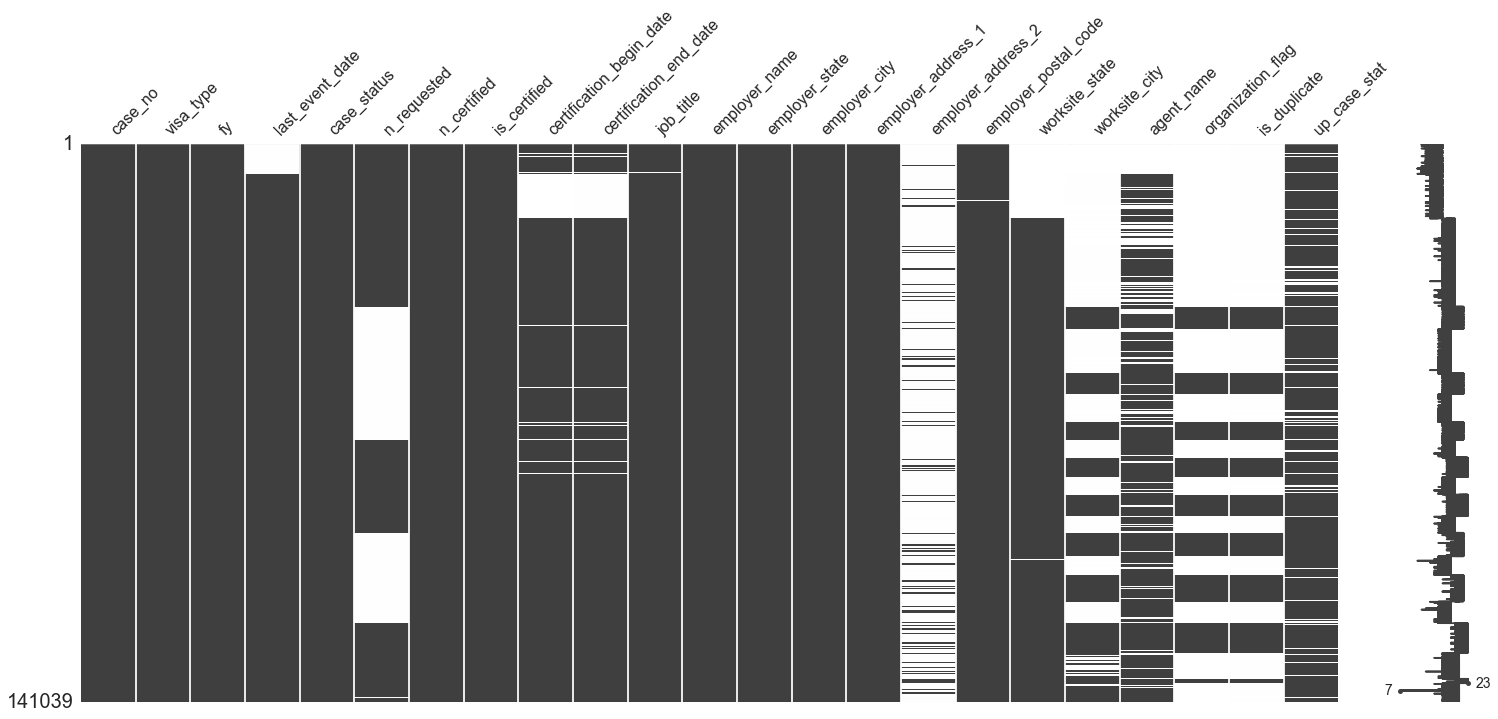

FULL CERTIFICATION               109236
PARTIAL CERTIFICATION             12243
FULL CERTIFICATION EXPIRED         1257
PARTIAL CERTIFICATION EXPIRED       117
Name: up_case_stat, dtype: int64

In [578]:
msno.matrix(vd_06_16)
vd_06_16['up_case_stat'].value_counts()

Let's follow the same procedure for non-certified visas.

In [579]:
# Create a separate dataset that contains only rows for which is_certified is False.
vd_not_certified = vd_06_16[vd_06_16['is_certified'] == False]
vd_not_certified['case_status'].unique()

array(['DENIED', 'CERTIFIED - FULL', 'INCOMPLETE', 'RECEIVED',
       'MODIFICATION', 'CERTIFIED - PARTIAL', 'DATA REVIEW',
       'FINAL REVIEW', 'REMAND TO SWA', 'WITHDRAWN', 'CERTIFIED',
       'DETERMINATION ISSUED - WITHDRAWN', 'DETERMINATION ISSUED - DENIED'], dtype=object)

Unfortunately, there are statuses in the non-certified group that indicate successful certification. Let's find out how many of these there are.

In [580]:
vd_not_certified['case_status'].value_counts()

DENIED                              13558
WITHDRAWN                            2733
CERTIFIED - FULL                      652
DETERMINATION ISSUED - DENIED         357
DETERMINATION ISSUED - WITHDRAWN      337
INCOMPLETE                            320
RECEIVED                              110
REMAND TO SWA                          55
MODIFICATION                           48
CERTIFIED - PARTIAL                     9
FINAL REVIEW                            3
DATA REVIEW                             3
CERTIFIED                               1
Name: case_status, dtype: int64

`CERTIFIED` and `CERTIFIED - PARTIAL` have under `10` entries each in this group. Since there are so few, and these rows indicate contradictory status info, let's go ahead and delete them from the dataset.

In [581]:
vd_not_cert_cert = vd_not_certified[vd_not_certified['case_status'] == 'CERTIFIED']

In [582]:
# Drop from dataset.
print(vd_not_certified.shape)
vd_not_certified = vd_not_certified.drop(vd_not_cert_cert.index)
print(vd_not_certified.shape)

(18186, 23)
(18185, 23)


We'll also drop them from the original dataset.

In [583]:
# Drop from vd_06_16.
print(vd_06_16.shape)
vd_06_16 = vd_06_16.drop(vd_not_cert_cert.index)
print(vd_06_16.shape)

(141039, 23)
(141038, 23)


In [584]:
vd_not_cert_p_cert = vd_not_certified[vd_not_certified['case_status'] == 'CERTIFIED - PARTIAL']
vd_not_cert_p_cert

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,up_case_stat
50712,C-06143-02481,H-2A,2006-01-01,NaT,CERTIFIED - PARTIAL,2.0,0,False,2006-06-02,2006-11-01,...,HAZELTON,2884 STATE HWY. 24,NaN,83335,NaN,NaN,NaN,NaN,NaN,NaN
63187,C-06311-03279,H-2A,2007-01-01,2006-12-08,CERTIFIED - PARTIAL,1.0,0,False,2007-01-10,2007-04-15,...,LOS BANOS,20654 HENRY MILLER RD.,NaN,93635-0000,CA,NaN,NaN,NaN,NaN,NaN
63230,C-06311-03279,H-2A,2007-01-01,2006-12-08,CERTIFIED - PARTIAL,1.0,0,False,2007-01-10,2008-01-09,...,RUBY VALLE,HC 60 BOX 490,NaN,89833,NV,NaN,NaN,NaN,NaN,NaN
67305,A-07057-03334,H-2A,2007-01-01,2007-04-03,CERTIFIED - PARTIAL,0.0,0,False,2007-04-27,2007-12-31,...,FALLS OF ROUGH,5921 HWY 110,NaN,40119,KY,NaN,NaN,NaN,NaN,NaN
67306,A-07057-03334,H-2A,2007-01-01,2007-04-03,CERTIFIED - PARTIAL,0.0,0,False,2007-04-27,2007-12-31,...,FALLS OF ROUGH,4825 HWY 110,NaN,40119,KY,NaN,NaN,NaN,NaN,NaN
67541,A-07082-03653,H-2A,2007-01-01,2007-04-10,CERTIFIED - PARTIAL,0.0,0,False,2007-05-07,2007-12-01,...,CHAPMANSBORO,1051DORRIS WINTERS ROAD,NaN,37035,TN,NaN,NaN,NaN,NaN,NaN
67987,A-07103-03837,H-2A,2007-01-01,2007-05-01,CERTIFIED - PARTIAL,0.0,0,False,2007-05-29,2008-01-15,...,MAYFIELD,95 BEECH GROVE RD.,NaN,42066,KY,NaN,NaN,NaN,NaN,NaN
69096,A-07130-04070,H-2A,2007-01-01,2007-06-05,CERTIFIED - PARTIAL,0.0,0,False,2007-07-02,2007-11-30,...,CEDAR HILL,4725 RICHARDS ROAD,NaN,37032,TN,NaN,NaN,NaN,NaN,NaN
69439,A-07157-04269,H-2A,2007-01-01,2007-06-22,CERTIFIED - PARTIAL,0.0,0,False,2007-07-23,2008-02-01,...,SPRINGFIELD,300 RUDOLPH ST.,NaN,37172,TN,NaN,NaN,NaN,NaN,NaN


An argument could be made to keep the three entries that have non-zero values in the `n_requested` column. We would then have to decide how to code these (e.g., `INCOMPLETE`). For the sake of brevity, we will remove these entries with the rest.

In [585]:
# Drop from dataset.
print(vd_not_certified.shape)
vd_not_certified = vd_not_certified.drop(vd_not_cert_p_cert.index)
print(vd_not_certified.shape)

(18185, 23)
(18176, 23)


In [586]:
# Drop from vd_06_16.
print(vd_06_16.shape)
vd_06_16 = vd_06_16.drop(vd_not_cert_p_cert.index)
print(vd_06_16.shape)

(141038, 23)
(141029, 23)


Because there are `652` entries in the non-certified group with a status of `CERTIFIED - FULL`, let's look into those in more detail before we remove them.

In [587]:
vd_not_cert_cert_f = vd_not_certified[vd_not_certified['case_status'] == 'CERTIFIED - FULL']
vd_not_cert_cert_f

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,up_case_stat
43919,A-06054-00840,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-04-05,2006-12-02,...,FARMVILLE,1571 STONEY POINT ROAD,NaN,23901,NaN,NaN,NaN,NaN,NaN,NaN
43927,A-05262-00055,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2005-11-01,2006-07-15,...,ARCADIA,P.O. BOX 551,NaN,34265,NaN,NaN,NaN,NaN,NaN,NaN
44042,A-05293-00107,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2005-12-15,2006-10-15,...,SHAW,545 JONES BAYOU ROAD,NaN,38773,NaN,NaN,NaN,NaN,NaN,NaN
44052,A-06060-00924,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-04-15,2006-11-05,...,ROSEBORO,10725 CLAY FORK HILL ROAD,NaN,28382,NaN,NaN,NaN,NaN,NaN,NaN
44167,A-05349-00261,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-02-05,2006-12-15,...,HOPKINSVILLE,3501 BRADSHAW ROAD,NaN,42240,NaN,NaN,NaN,NaN,NaN,NaN
44173,A-05353-00268,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-02-15,2006-12-15,...,PARIS,450 REYNOLDSBURG ROAD,NaN,38242,NaN,NaN,NaN,NaN,NaN,NaN
44202,A-05357-00295,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-02-15,2006-11-30,...,ISOLA,131COUNTY LINE ROAD,NaN,38754,NaN,NaN,NaN,NaN,NaN,NaN
44261,A-05363-00332,H-2A,2006-01-01,NaT,CERTIFIED - FULL,NaN,0,False,2006-02-15,2006-12-15,...,SPRINGFIELD,3900 MEMORIAL BLVD.,NaN,37172,NaN,NaN,NaN,NaN,NaN,NaN
44337,A-06010-00390,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-02-25,2006-12-25,...,MADISONVILLE,165 ADAMS LN,NaN,42431,NaN,NaN,NaN,NaN,NaN,NaN
44358,A-06080-01136,H-2A,2006-01-01,NaT,CERTIFIED - FULL,0.0,0,False,2006-05-07,2007-02-01,...,ADAMS,2921 HUGH GRILL ROAD,NaN,37010,NaN,NaN,NaN,NaN,NaN,NaN


In [588]:
# Find out whether there are entries with a non-zero value for n_requested.
vd_not_cert_cert_f_non_z_req = vd_not_cert_cert_f[vd_not_cert_cert_f['n_requested'] > 0]
vd_not_cert_cert_f_non_z_req

,case_no,visa_type,fy,last_event_date,case_status,n_requested,n_certified,is_certified,certification_begin_date,certification_end_date,...,employer_city,employer_address_1,employer_address_2,employer_postal_code,worksite_state,worksite_city,agent_name,organization_flag,is_duplicate,up_case_stat


There are none. Because all of these entries marked `CERTIFIED` do not have any requests associated with them, it should be safe to assume that the `CERTIFIED` flag is an error. Let's remove these as well.

In [589]:
# Drop from dataset.
print(vd_not_certified.shape)
vd_not_certified = vd_not_certified.drop(vd_not_cert_cert_f.index)
print(vd_not_certified.shape)

(18176, 23)
(17524, 23)


In [590]:
# Drop from vd_06_16.
print(vd_06_16.shape)
vd_06_16 = vd_06_16.drop(vd_not_cert_cert_f.index)
print(vd_06_16.shape)

(141029, 23)
(140377, 23)


Let's look at our updated statuses for the non-certified cases.

In [591]:
vd_not_certified['case_status'].value_counts()

DENIED                              13558
WITHDRAWN                            2733
DETERMINATION ISSUED - DENIED         357
DETERMINATION ISSUED - WITHDRAWN      337
INCOMPLETE                            320
RECEIVED                              110
REMAND TO SWA                          55
MODIFICATION                           48
FINAL REVIEW                            3
DATA REVIEW                             3
Name: case_status, dtype: int64

All of the case statuses in our `is_certified == False` dataset are some variation of `"DENIED,"` `"WITHDRAWN,"` and `"INCOMPLETE."` Let's group them accordingly.

In [592]:
vd_not_certified['case_status'] = vd_not_certified['case_status'].replace(['DENIED', 'DETERMINATION ISSUED - DENIED'], 
                                                                          'DENIED')
vd_not_certified['case_status'] = vd_not_certified['case_status'].replace(['WITHDRAWN', 'DETERMINATION ISSUED - WITHDRAWN'],
                                                                          'WITHDRAWN')
vd_not_certified['case_status'] = vd_not_certified['case_status'].replace(['INCOMPLETE', 'RECEIVED', 'REMAND TO SWA',
                                                                  'MODIFICATION', 'FINAL REVIEW', 'DATA REVIEW'],
                                                                  'INCOMPLETE')

In [593]:
# Ensure the mapping was successful.
vd_not_certified['case_status'].value_counts()

DENIED        13915
WITHDRAWN      3070
INCOMPLETE      539
Name: case_status, dtype: int64

Now, we'll add these statuses to the `up_case_stat` column in `vd_06_16`.

In [594]:
vd_06_16.loc[(vd_not_certified[vd_not_certified['case_status'] == 'DENIED'].index), 'up_case_stat'] = 'DENIED'
vd_06_16.loc[(vd_not_certified[vd_not_certified['case_status'] == 'WITHDRAWN'].index), 'up_case_stat'] = 'WITHDRAWN'
vd_06_16.loc[(vd_not_certified[vd_not_certified['case_status'] == 'INCOMPLETE'].index), 'up_case_stat'] = 'INCOMPLETE'

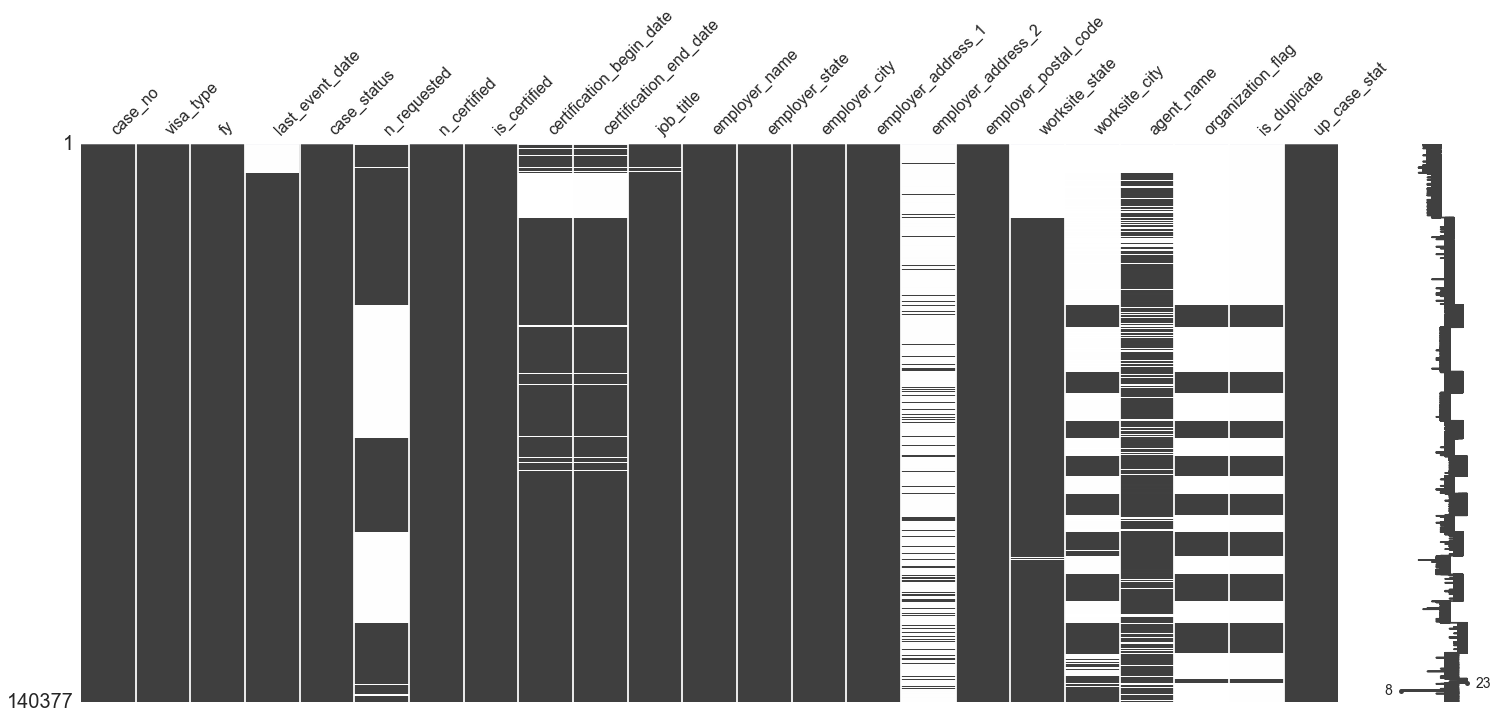

FULL CERTIFICATION               109236
DENIED                            13915
PARTIAL CERTIFICATION             12243
WITHDRAWN                          3070
FULL CERTIFICATION EXPIRED         1257
INCOMPLETE                          539
PARTIAL CERTIFICATION EXPIRED       117
Name: up_case_stat, dtype: int64

In [595]:
msno.matrix(vd_06_16)
vd_06_16['up_case_stat'].value_counts()

We have now fully recoded our case statuses and stored the updated values in a new column called `up_case_stat`, which contains no null values.

In [596]:
# Check that up_case_stat has zero null values.
vd_06_16[vd_06_16['up_case_stat'].isnull() == True].shape[0]

0

## Analysis ##

In [597]:
import seaborn as sns

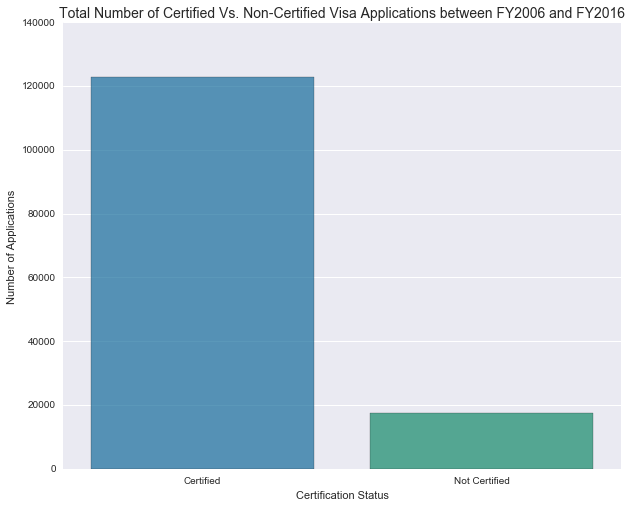

In [598]:
# Plot histogram of certified vs non-certified visa applications between FY2006 and FY2016.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax = sns.barplot(vd_06_16['is_certified'].value_counts().index, vd_06_16['is_certified'].value_counts().values, order=[True, False],
           palette='colorblind', alpha=0.7)
ax.set_xticklabels(['Certified', 'Not Certified'])
ax.set_xlabel('Certification Status')
ax.set_ylabel('Number of Applications')
ax.set_title('Total Number of Certified Vs. Non-Certified Visa Applications between FY2006 and FY2016', size=14)
sns.plt.show()

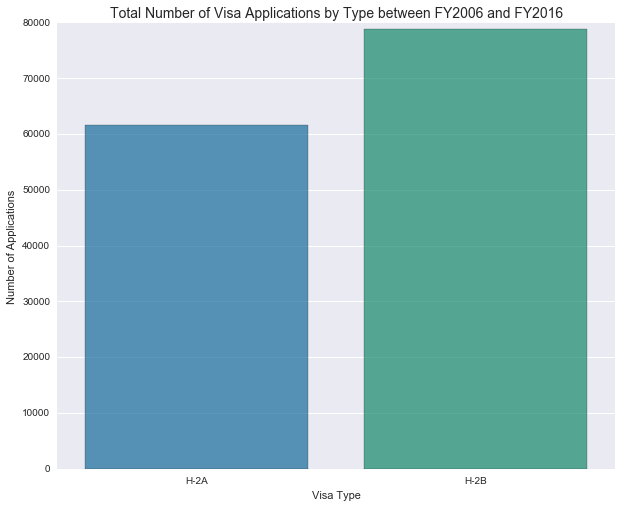

In [599]:
# Plot histogram of H-2A vs H-2B visa applications between FY2006 and FY2016.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax = sns.barplot(vd_06_16['visa_type'].value_counts().index, vd_06_16['visa_type'].value_counts().values, order=['H-2A', 'H-2B'],
           palette='colorblind', alpha=0.7)
ax.set_xlabel('Visa Type')
ax.set_ylabel('Number of Applications')
ax.set_title('Total Number of Visa Applications by Type between FY2006 and FY2016', size=14)
sns.plt.show()

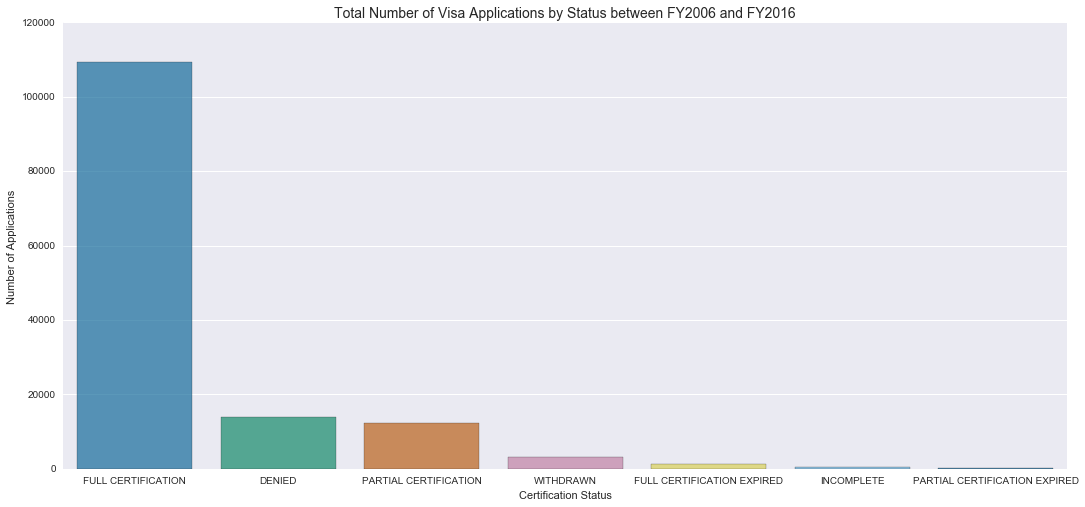

In [600]:
# Plot histogram of case status totals between FY2006 and FY2016.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax = sns.barplot(vd_06_16['up_case_stat'].value_counts().index, vd_06_16['up_case_stat'].value_counts().values,
           palette='colorblind', alpha=0.7)
ax.set_xlabel('Certification Status')
ax.set_ylabel('Number of Applications')
ax.set_title('Total Number of Visa Applications by Status between FY2006 and FY2016', size=14)
sns.plt.show()

Next, we want to look at our visa data conditioned on additional criteria. We'll create a new dataframe with the same data, but we'll add a `count` column, which will help us measure a variable (such as visa type or certification status) conditioned on another variable, such as year.

In [601]:
# Create separate dataframe with counts column.
vd_counts = vd_06_16.copy()
vd_counts['count'] = 1

In [602]:
# Create pivot table to examine number of certifications by visa type.
cert_by_type_pivot = pd.pivot_table(vd_counts, values='count', index='visa_type', columns='is_certified', aggfunc=np.sum)
cert_by_type_pivot

is_certified,False,True
visa_type,,
H-2A,3553,58075
H-2B,13971,64778


In [603]:
# Capture number certified and not certified for each visa type.
certified = pd.Series([cert_by_type_pivot.values[0][1], cert_by_type_pivot.values[1][1]])
not_certified = pd.Series([cert_by_type_pivot.values[0][0], cert_by_type_pivot.values[1][0]])

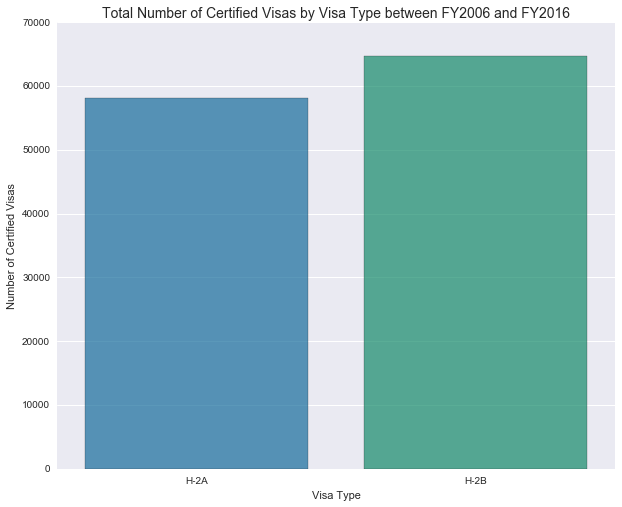

In [604]:
# Plot histogram of certifications by visa type.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax = sns.barplot(cert_by_type_pivot.index, certified, order=['H-2A', 'H-2B'],
           palette='colorblind', alpha=0.7)
ax.set_xticklabels(['H-2A', 'H-2B'])
ax.set_xlabel('Visa Type')
ax.set_ylabel('Number of Certified Visas')
ax.set_title('Total Number of Certified Visas by Visa Type between FY2006 and FY2016', size=14)
sns.plt.show()

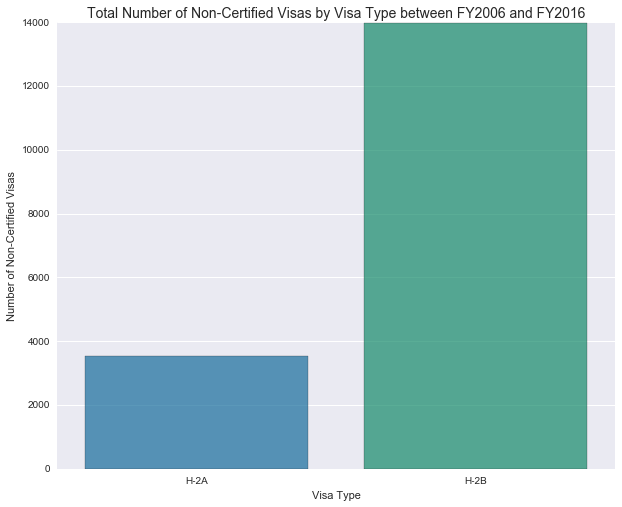

In [605]:
# Plot histogram of non-certifications by visa type.
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax = sns.barplot(cert_by_type_pivot.index, not_certified, order=['H-2A', 'H-2B'],
           palette='colorblind', alpha=0.7)
ax.set_xticklabels(['H-2A', 'H-2B'])
ax.set_xlabel('Visa Type')
ax.set_ylabel('Number of Non-Certified Visas')
ax.set_title('Total Number of Non-Certified Visas by Visa Type between FY2006 and FY2016', size=14)
sns.plt.show()

By looking at the histograms above compared with the total number of applications by visa type, we can see that H-2A visa applications have a higher rate of certification than H-2B applicatyions.

Next, let's see how the number of visa applications by type changed from year to year.

In [606]:
# Create pivot table to examine number of visas by type from year to year.
vd_type_vs_fy_pivot = pd.pivot_table(vd_counts, values='count', index='fy', columns='visa_type', aggfunc=np.sum)
vd_type_vs_fy_pivot.head()

visa_type,H-2A,H-2B
fy,,
2006-01-01,7170,11267
2007-01-01,7387,14565
2008-01-01,5637,11180
2009-01-01,5267,7086
2010-01-01,4422,4534


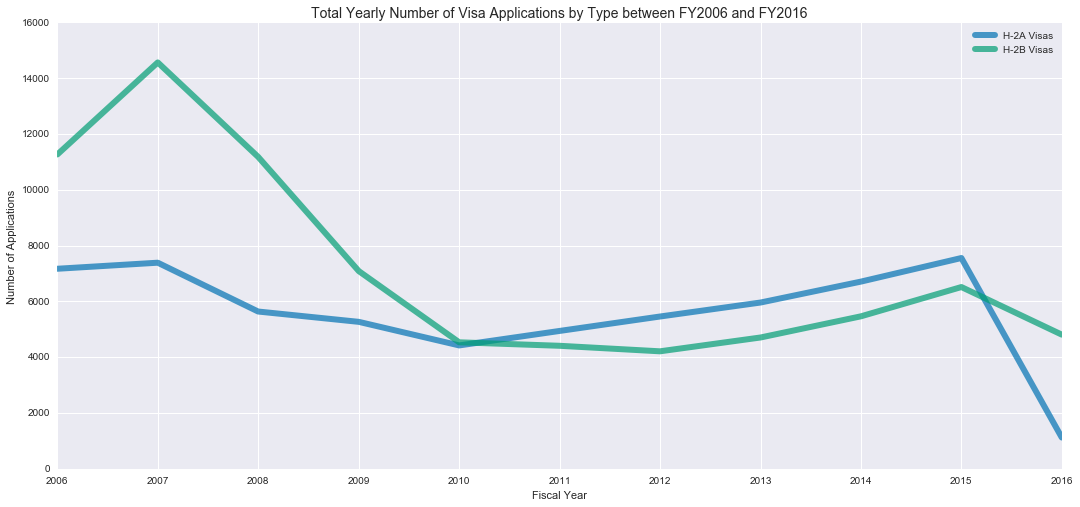

In [621]:
# Plot line chart of number of visas by type versus fy.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(vd_type_vs_fy_pivot.index, vd_type_vs_fy_pivot.values, linewidth=6, alpha=0.7)
ax.legend(['H-2A Visas', 'H-2B Visas'])
plt.title('Total Yearly Number of Visa Applications by Type between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Applications')
sns.set_palette('colorblind')
plt.show()

Next, how has the number of certified applications changed over time?

In [608]:
# Create pivot table to examine number of certifications from year to year.
certs_vs_fy_pivot = pd.pivot_table(vd_counts, values='count', index='fy', columns='is_certified', aggfunc=np.sum)
certs_vs_fy_pivot.head()

is_certified,False,True
fy,,
2006-01-01,2738,15699
2007-01-01,4017,17935
2008-01-01,1323,15494
2009-01-01,1627,10726
2010-01-01,1161,7795


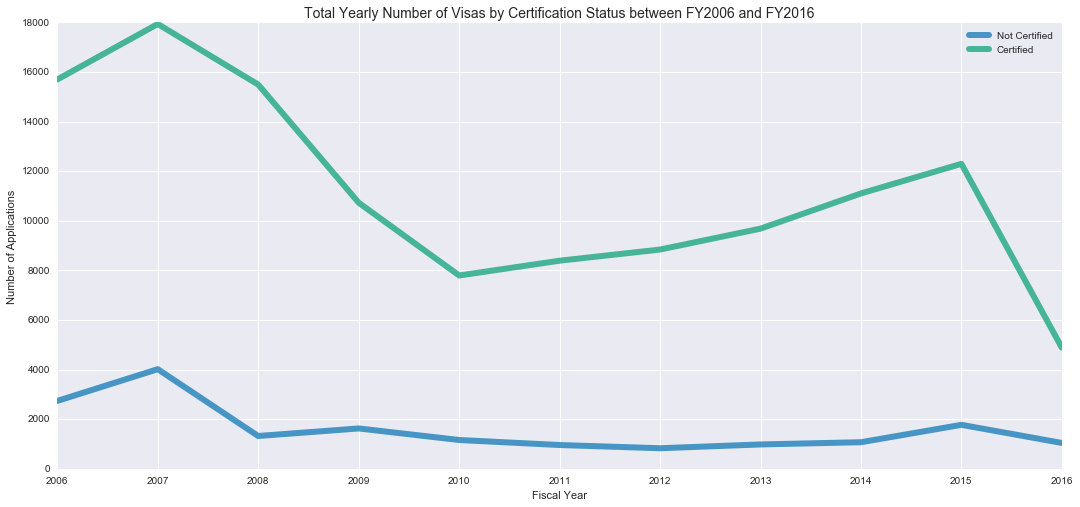

In [609]:
# Plot line chart of number of certifications from year to year.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(certs_vs_fy_pivot.index, certs_vs_fy_pivot.values, linewidth=6, alpha=0.7)
ax.legend(['Not Certified', 'Certified'])
plt.title('Total Yearly Number of Visas by Certification Status between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Applications')
sns.set_palette('colorblind')
plt.show()

We can break this data down further into individual case statuses and track the yearly totals between FY2006 and FY2016.

In [610]:
# Create pivot table to examine number of certifications by case status from year to year.
certs_vs_fy_pivot_detail = pd.pivot_table(vd_counts, values='count', index='fy', columns='up_case_stat', aggfunc=np.sum,
                                          fill_value=0)
certs_vs_fy_pivot_detail.head()

up_case_stat,DENIED,FULL CERTIFICATION,FULL CERTIFICATION EXPIRED,INCOMPLETE,PARTIAL CERTIFICATION,PARTIAL CERTIFICATION EXPIRED,WITHDRAWN
fy,,,,,,,
2006-01-01,2255,15387,0,483,312,0,0
2007-01-01,3963,17123,0,54,812,0,0
2008-01-01,1090,13958,0,0,1536,0,233
2009-01-01,1389,8714,0,2,2012,0,236
2010-01-01,1062,6350,0,0,1445,0,99


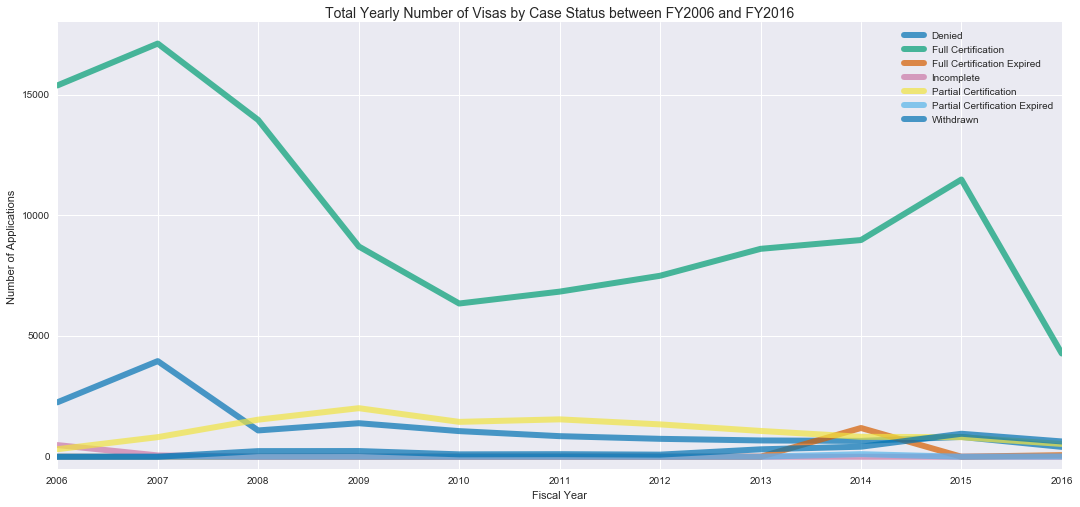

In [611]:
# Plot line chart of number of certifications by case status from year to year.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(certs_vs_fy_pivot_detail.index, certs_vs_fy_pivot_detail.values, alpha=0.7, linewidth=6)
plt.ylim(-500)
ax.legend(['Denied', 'Full Certification', 'Full Certification Expired', 'Incomplete', 'Partial Certification',
          'Partial Certification Expired', 'Withdrawn'])
plt.title('Total Yearly Number of Visas by Case Status between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Applications')
sns.set_palette('colorblind')
plt.show()

We also want to look at how the number of approved *workers* has changed year to year. We can do this by examining the `n_certified` column.

In [612]:
# Create pivot table to examine number of approved workers from year to year.
app_workers_pivot = pd.pivot_table(vd_counts, values='n_certified', index='fy', aggfunc=np.sum,
                                          fill_value=0)
app_workers_pivot.head()

fy
2006-01-01    272291
2007-01-01    344210
2008-01-01    344662
2009-01-01    247891
2010-01-01    165752
Name: n_certified, dtype: int64

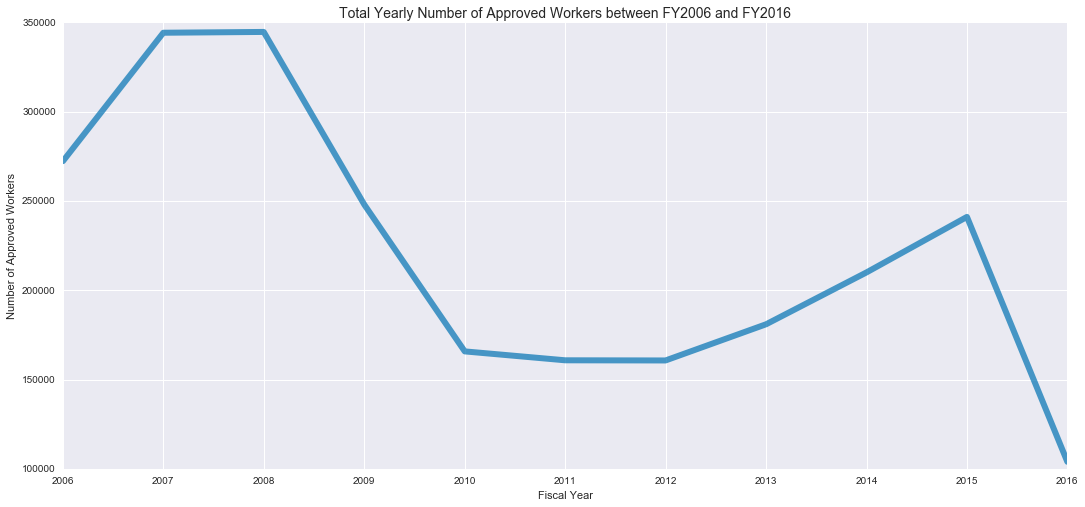

In [613]:
# Plot line chart of number of approved workers from year to year.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(app_workers_pivot.index, app_workers_pivot.values, alpha=0.7, linewidth=6)
plt.title('Total Yearly Number of Approved Workers between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Approved Workers')
sns.set_palette('colorblind')
plt.show()

Next, let's look at the yearly approved worker data broken down by case status.

In [614]:
# Create pivot table to examine number of approved workers by case status from year to year.
app_workers_vs_case_pivot = pd.pivot_table(vd_counts, values='n_certified', index='fy', columns='up_case_stat', aggfunc=np.sum,
                                          fill_value=0)
app_workers_vs_case_pivot.head()

up_case_stat,DENIED,FULL CERTIFICATION,FULL CERTIFICATION EXPIRED,INCOMPLETE,PARTIAL CERTIFICATION,PARTIAL CERTIFICATION EXPIRED,WITHDRAWN
fy,,,,,,,
2006-01-01,0,262189,0,0,10102,0,0
2007-01-01,0,314006,0,0,30204,0,0
2008-01-01,0,282355,0,0,62307,0,0
2009-01-01,0,168548,0,0,79343,0,0
2010-01-01,0,116188,0,0,49564,0,0


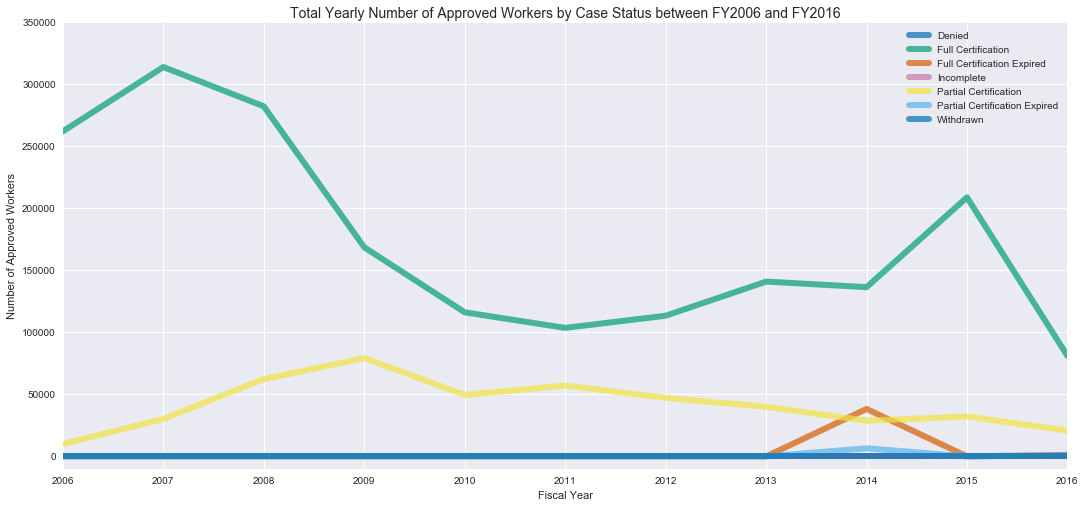

In [615]:
# Plot line chart of number of approved workers by case status from year to year.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(app_workers_vs_case_pivot.index, app_workers_vs_case_pivot.values, alpha=0.7, linewidth=6)
plt.ylim(-10000)
ax.legend(['Denied', 'Full Certification', 'Full Certification Expired', 'Incomplete', 'Partial Certification',
          'Partial Certification Expired', 'Withdrawn'])
plt.title('Total Yearly Number of Approved Workers by Case Status between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Approved Workers')
sns.set_palette('colorblind')
plt.show()

What about approved workers by visa type?

In [616]:
# Create pivot table to examine number of approved workers by visa type from year to year.
app_workers_vs_type_pivot = pd.pivot_table(vd_counts, values='n_certified', index='fy', columns='visa_type', aggfunc=np.sum,
                                          fill_value=0)
app_workers_vs_type_pivot.head()

visa_type,H-2A,H-2B
fy,,
2006-01-01,72557,199734
2007-01-01,89575,254635
2008-01-01,90082,254580
2009-01-01,85985,161906
2010-01-01,79203,86549


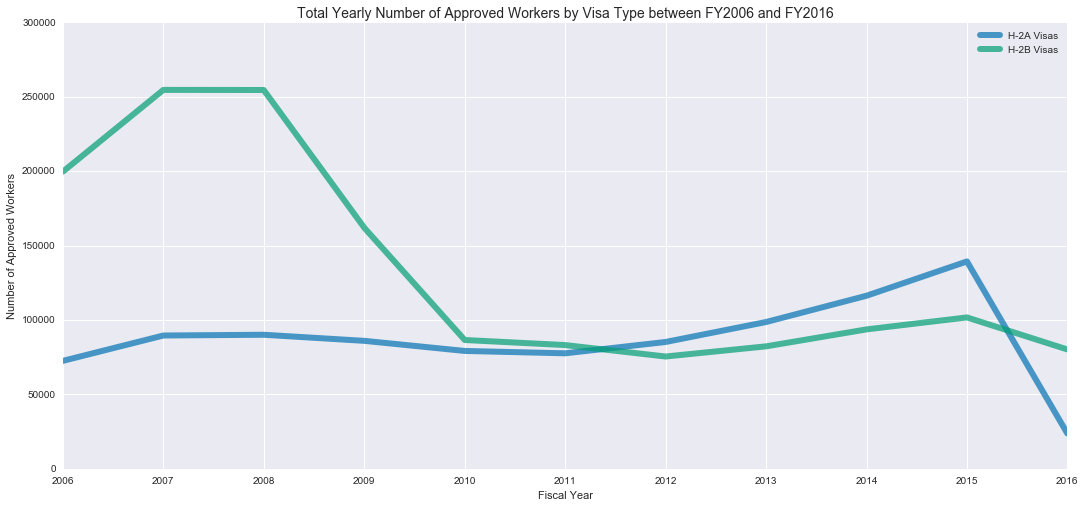

In [617]:
# Plot line chart of number of approved workers by visa type from year to year.
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.plot(app_workers_vs_type_pivot.index, app_workers_vs_type_pivot.values, linewidth=6, alpha=0.7)
ax.legend(['H-2A Visas', 'H-2B Visas'])
plt.title('Total Yearly Number of Approved Workers by Visa Type between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Approved Workers')
sns.set_palette('colorblind')
plt.show()

Finally, let's examine how the number of approved workers by employer state changed over the years.

In [618]:
# Create pivot table to examine number of approved workers by visa type from year to year.
app_workers_vs_state_pivot = pd.pivot_table(vd_counts, values='n_certified', index='fy', columns='employer_state', aggfunc=np.sum,
                                          fill_value=0)
app_workers_vs_state_pivot.head()

employer_state,AB,AK,AL,ALBERTA,AR,AZ,CA,CO,CT,DC,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
fy,,,,,,,,,,,,,,,,,,,,,
2006-01-01,0,83,2221,243,8852,4703,9327,15119,1910,0,...,3303,27704,5298,13980,5,1467,1716,1070,193,2847
2007-01-01,206,115,6482,0,11317,7048,10219,17680,2949,62,...,4761,37220,7120,14461,7,2189,2932,1163,364,3084
2008-01-01,248,153,3951,0,9031,12120,10821,18810,3151,388,...,5281,36776,9274,13493,0,1776,4360,1390,484,2749
2009-01-01,218,103,2819,0,6911,6802,6887,10655,1462,80,...,3935,23702,7030,11268,40,1153,3021,733,543,1808
2010-01-01,195,111,1874,0,4262,5182,6169,6015,1041,50,...,2631,14974,3527,6951,0,879,3759,403,186,818


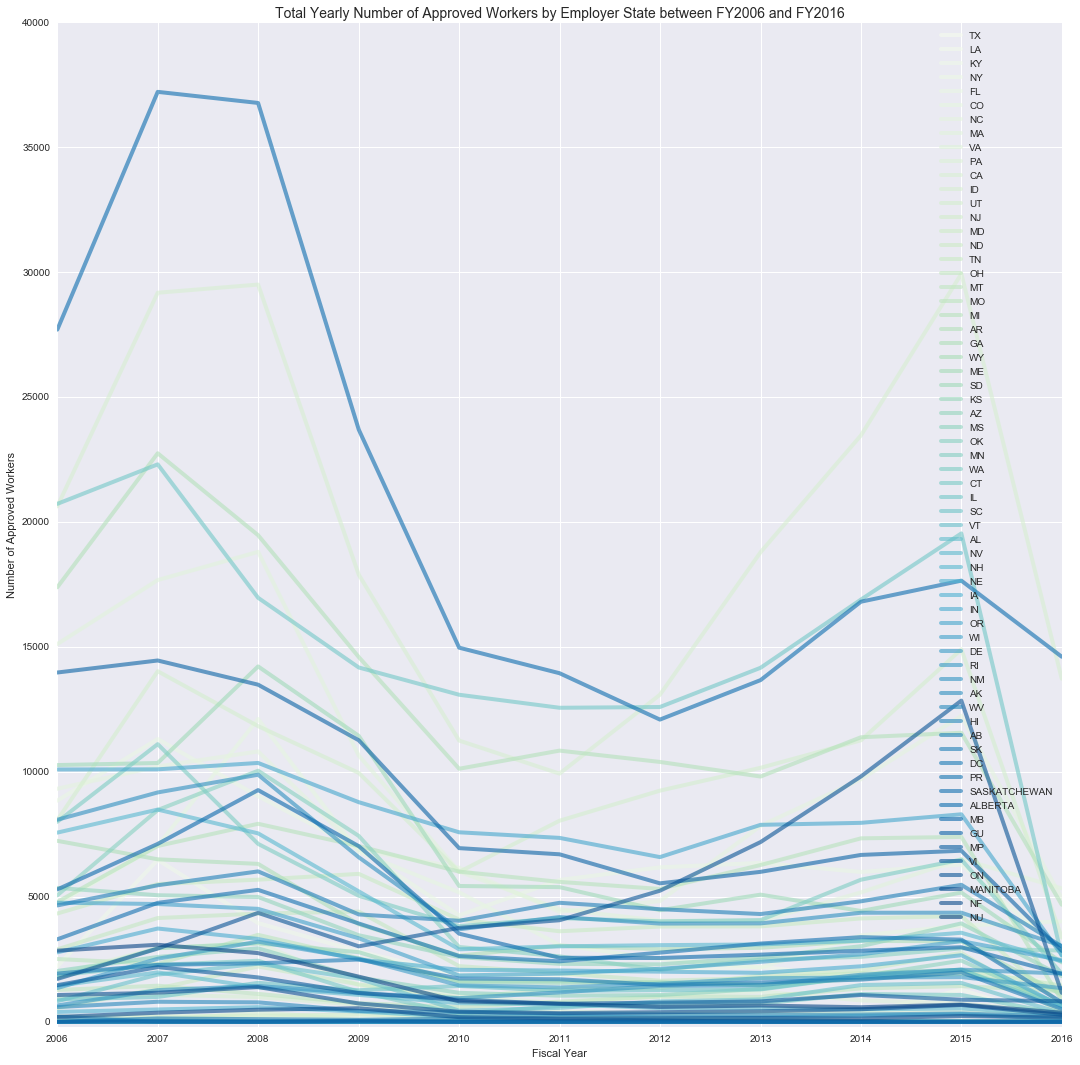

In [623]:
# Plot line chart of number of approved workers by employer state from year to year.
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(111)
ax.plot(app_workers_vs_state_pivot.index, app_workers_vs_state_pivot.values, linewidth=4, alpha=0.6)
ax.legend(vd_counts['employer_state'].value_counts().index)
plt.ylim(-200)
plt.title('Total Yearly Number of Approved Workers by Employer State between FY2006 and FY2016', size=14)
ax.set_xlabel('Fiscal Year')
ax.set_ylabel('Number of Approved Workers')
sns.set_palette("GnBu", 64)
plt.show()

While a `Basemap` visualization might be more effective here to understand the per-state approvals, we can at least see that, with the exception of a few states, the general trend of more approvals during FY2006-FY2010, less during FY2010-FY2013, and another increase in approvals from FY2013-FY2016, holds across states.

We can see a clear downward trend in visa approvals across states for the few years following FY2008, which is perhaps a reflection of the state of the job market after the Financial Crisis of 2007-2008.